### Support Vector Regression

In [26]:
# import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [28]:
# Feature Scaling always accepts 2D array so we need to convert the 1D array to 2D array
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [29]:
# Feature Scaling
# Dataset not to be split as the model needs to understand the relationship between all the levels
"""We need to apply feature scaling to both the dependent and independent variables
because the dependent variable value is too high as compared to the independent variable"""

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

print(np.concatenate((X,y),1))

[[-1.5666989  -0.72004253]
 [-1.21854359 -0.70243757]
 [-0.87038828 -0.66722767]
 [-0.52223297 -0.59680786]
 [-0.17407766 -0.49117815]
 [ 0.17407766 -0.35033854]
 [ 0.52223297 -0.17428902]
 [ 0.87038828  0.17781001]
 [ 1.21854359  0.88200808]
 [ 1.5666989   2.64250325]]


In [30]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X,y)

d:\Code&Repositories\ML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [49]:
# Predicting the SVR model with a new value
"""
Reshaping for prediction:
If you want to predict on a new data point with only one feature, 
you would need to reshape it into a 2D array with a single row and one column, 
like this: new_data = np.array([[new_feature_value]]).reshape(-1, 1). 
Link : https://medium.com/@jwbtmf/reshaping-the-dataset-for-neural-network-15ee7bcea25e#:~:text=The%20shape%20of%20input%20data,be%20processed%20by%20the%20CNN.
"""
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

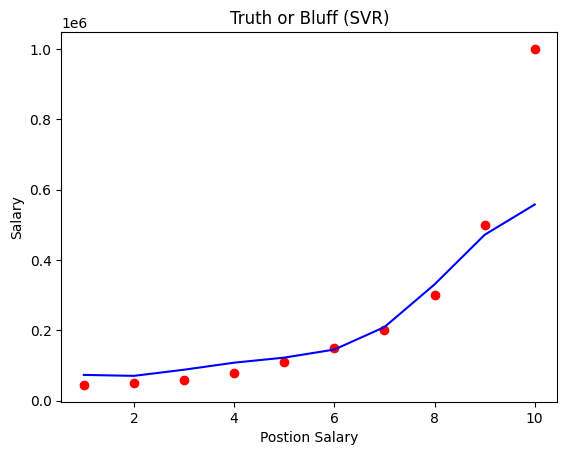

In [66]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Postion Salary')
plt.ylabel('Salary')
plt.show()

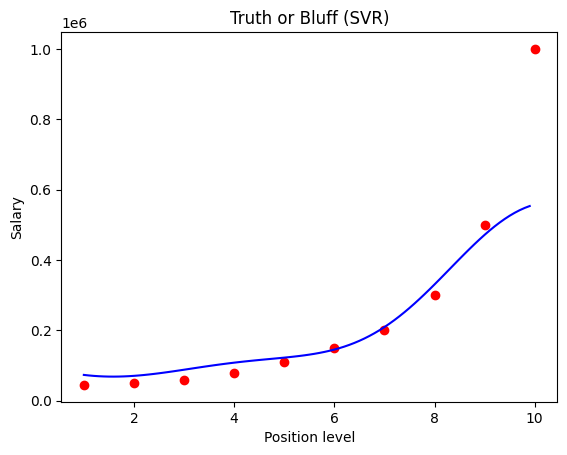

In [95]:
# Visualising the SVR results (for higher resolution and smoother curve)
# X and y are already both scaled
X_grid = np.arange(min(sc_X.inverse_transform(X)[:,0]), max(sc_X.inverse_transform(X)[:,0]), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) # X_grid is unscaled

#Plot the graph
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()